In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!unzip /content/aviakompaniya.zip

Archive:  /content/aviakompaniya.zip
  inflating: sample_submission.csv   
  inflating: test_dataset.csv        
  inflating: train_dataset.csv       


In [39]:
df=pd.read_csv('/content/train_dataset.csv').drop('id',axis=1)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,4,...,4,3,1,3,4,3,4,10,3.0,0
1,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,4,...,5,5,5,5,3,5,3,0,0.0,1
2,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,2,...,4,5,2,5,3,5,4,0,10.0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 10000 non-null  int64  
 1   Gender                             10000 non-null  object 
 2   Customer Type                      10000 non-null  object 
 3   Age                                10000 non-null  int64  
 4   Type of Travel                     10000 non-null  object 
 5   Class                              10000 non-null  object 
 6   Flight Distance                    10000 non-null  int64  
 7   Inflight wifi service              10000 non-null  int64  
 8   Departure/Arrival time convenient  10000 non-null  int64  
 9   Ease of Online booking             10000 non-null  int64  
 10  Gate location                      10000 non-null  int64  
 11  Food and drink                     10000 non-null  int6

In [9]:
df.shape

(10000, 24)

In [12]:
df.duplicated().sum()

0

In [40]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy='mean')

In [41]:
df[['Arrival Delay in Minutes']]=imputer.fit_transform(df[['Arrival Delay in Minutes']])

In [42]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,39.375100,1229.556200,2.780200,3.065100,2.797800,2.981000,3.214500,3.349100,3.49140,3.402900,3.454100,3.415700,3.676200,3.360600,3.680100,3.311100,14.429900,14.709888,0.500000
std,14.897959,1022.281958,1.362745,1.527316,1.421168,1.283278,1.333217,1.352779,1.31122,1.331822,1.274777,1.308765,1.189746,1.258462,1.175118,1.311217,39.659674,39.990245,0.500025
min,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,421.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,40.000000,863.500000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.500000
75%,51.000000,1806.750000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,80.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,921.000000,924.000000,1.000000


In [38]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0


In [57]:
df[df['Departure Delay in Minutes']>300]

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
146,48,1894,3,5,3,3,5,5,5,5,5,5,5,5,5,5,307,299.0,1,0,1,1,0,1,0,1,0,0
503,41,3494,1,1,1,1,5,5,5,4,2,4,5,5,4,5,501,500.0,1,0,1,1,0,1,0,1,0,0
1011,30,667,3,4,4,4,4,1,1,2,3,3,3,1,1,1,338,334.0,0,1,0,0,1,1,0,1,0,0
2365,33,989,1,5,0,3,0,1,1,4,2,5,5,1,4,1,726,691.0,0,0,1,1,0,0,1,0,1,0
3348,51,1076,5,5,5,5,5,5,5,5,4,4,5,5,5,5,318,301.0,1,1,0,1,0,1,0,1,0,0
3715,36,954,3,3,3,3,3,3,3,1,1,4,2,3,3,3,531,485.0,1,0,1,1,0,1,0,0,1,0
4742,7,234,1,5,0,1,0,4,4,4,4,5,1,4,2,4,724,705.0,0,1,0,1,0,0,1,0,1,0
5139,52,1721,2,5,2,4,2,4,4,3,3,4,4,4,5,4,302,314.0,0,1,0,1,0,0,1,0,1,0
5182,43,577,3,3,3,2,3,5,5,5,4,5,5,5,3,5,921,924.0,0,0,1,0,1,1,0,1,0,0
5922,34,2881,4,4,4,4,4,3,3,2,1,4,4,3,3,3,454,502.0,1,0,1,1,0,1,0,1,0,0


In [56]:
pd.set_option("display.max_columns", None)

In [46]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [47]:
df[df.columns[-1]].value_counts()

0    5000
1    5000
Name: satisfaction, dtype: int64

In [48]:
df.corrwith(df['satisfaction'])

<ipython-input-48-ce58efa4e609>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['satisfaction'])


Age                                  0.144302
Flight Distance                      0.298703
Inflight wifi service                0.277395
Departure/Arrival time convenient   -0.067638
Ease of Online booking               0.164662
Gate location                        0.007169
Food and drink                       0.207854
Online boarding                      0.504986
Seat comfort                         0.342294
Inflight entertainment               0.400900
On-board service                     0.326426
Leg room service                     0.324368
Baggage handling                     0.247965
Checkin service                      0.232359
Inflight service                     0.240584
Cleanliness                          0.310338
Departure Delay in Minutes          -0.042960
Arrival Delay in Minutes            -0.048582
satisfaction                         1.000000
dtype: float64

In [50]:
ndf=pd.get_dummies(df)
ndf.corrwith(ndf.satisfaction)

Age                                  0.144302
Flight Distance                      0.298703
Inflight wifi service                0.277395
Departure/Arrival time convenient   -0.067638
Ease of Online booking               0.164662
Gate location                        0.007169
Food and drink                       0.207854
Online boarding                      0.504986
Seat comfort                         0.342294
Inflight entertainment               0.400900
On-board service                     0.326426
Leg room service                     0.324368
Baggage handling                     0.247965
Checkin service                      0.232359
Inflight service                     0.240584
Cleanliness                          0.310338
Departure Delay in Minutes          -0.042960
Arrival Delay in Minutes            -0.048582
satisfaction                         1.000000
Gender_Female                        0.002601
Gender_Male                         -0.002601
Customer Type_Loyal Customer      

In [52]:
df=ndf

In [53]:
X=df.drop('satisfaction',axis=1)
y=df['satisfaction']

In [54]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [111]:
from sklearn.model_selection import train_test_split
train_set,test_set,train_setlb,test_setlb=train_test_split(X,y,test_size=0.1,random_state=45)

In [112]:
train_scaled=scaler.fit_transform(train_set)
test_scaled=scaler.fit_transform(test_set)

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

In [113]:
k_list=[]
for k in range(1,25):
    kmodel=KNeighborsClassifier(n_neighbors=k)
    kmodel.fit(train_scaled,train_setlb)
    pred=kmodel.predict(test_scaled)
    k_list.append(metrics.f1_score(pred,test_setlb))



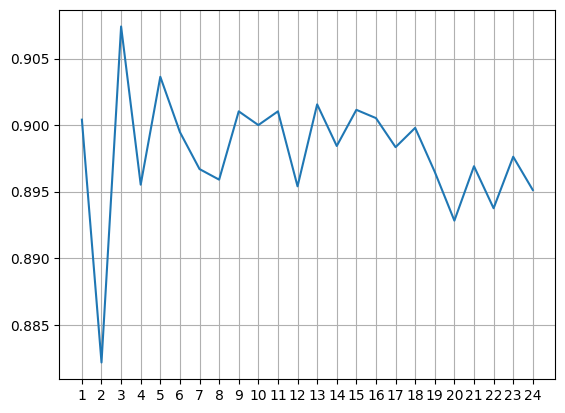

In [114]:
plt.plot(range(1,25),k_list)
plt.xticks(range(1,25))
plt.grid()
plt.show()

In [83]:
from sklearn.model_selection import GridSearchCV
gs_kmodel=GridSearchCV(KNeighborsClassifier(),{'n_neighbors':range(1,25)},cv=5)


In [115]:
gs_kmodel.fit(train_scaled,train_setlb)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 25)})

In [116]:
gs_kmodel.best_params_

{'n_neighbors': 7}

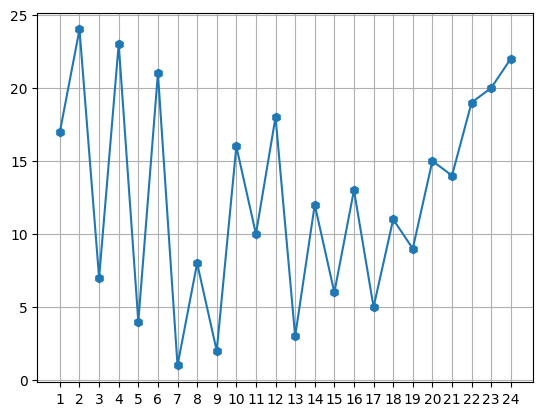

In [117]:
arr=gs_kmodel.cv_results_['rank_test_score']
plt.plot(range(1,25),arr,'h-')
plt.xticks(range(1,25))
plt.grid()
plt.show()

KNeighborsModel

jaccard score: 0.8127340823970037
accuracy score: 0.9


              precision    recall  f1-score   support

           0       0.87      0.93      0.90       499
           1       0.93      0.87      0.90       501

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000



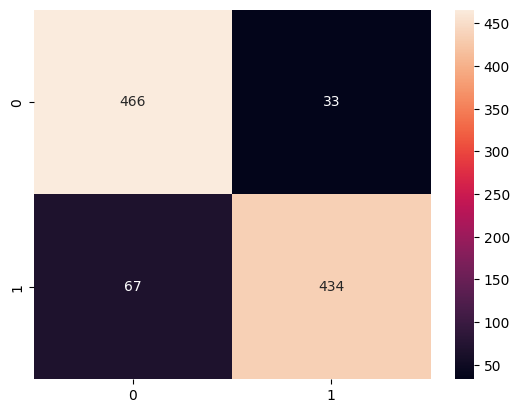

In [143]:
kmodel=KNeighborsClassifier(n_neighbors=7)
kmodel.fit(train_scaled,train_setlb)
pred=kmodel.predict(test_scaled)

print('jaccard score:',metrics.jaccard_score(test_setlb,pred))
print('accuracy score:',metrics.accuracy_score(test_setlb,pred))
print('\n')
print(metrics.classification_report(test_setlb,pred))

sns.heatmap(metrics.confusion_matrix(test_setlb,pred),annot=True,fmt='g')
plt.show()


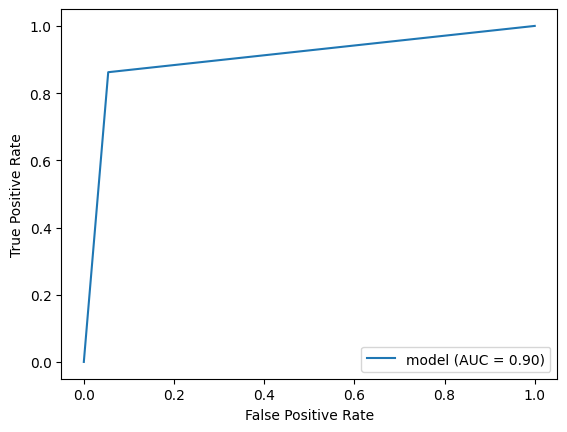

In [129]:
from sklearn.metrics import roc_curve
fpr,tpr,threshholds=roc_curve(test_setlb,pred)
roc_auc=metrics.auc(fpr,tpr)
displayobj=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name='model')
displayobj.plot()
plt.show()

DecsionTreeModel

jaccard score: 0.8450184501845018
accuracy score: 0.916


              precision    recall  f1-score   support

           0       0.91      0.92      0.92       499
           1       0.92      0.91      0.92       501

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000



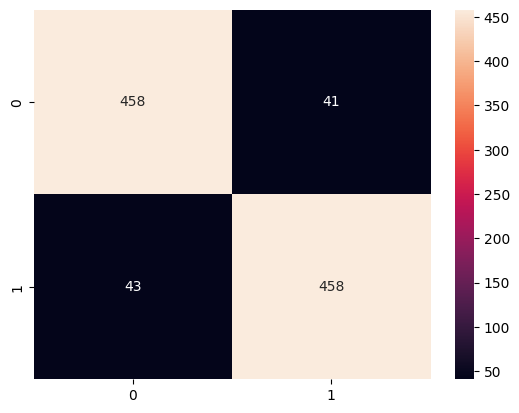

In [131]:
model=DecisionTreeClassifier()
model.fit(train_scaled,train_setlb)
pred=model.predict(test_scaled)

print('jaccard score:',metrics.jaccard_score(test_setlb,pred))
print('accuracy score:',metrics.accuracy_score(test_setlb,pred))
print('\n')
print(metrics.classification_report(test_setlb,pred))

sns.heatmap(metrics.confusion_matrix(test_setlb,pred),annot=True,fmt='g')
plt.show()


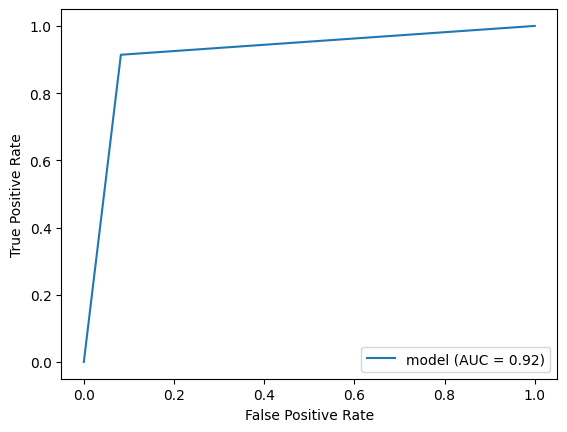

In [132]:
from sklearn.metrics import roc_curve
fpr,tpr,threshholds=roc_curve(test_setlb,pred)
roc_auc=metrics.auc(fpr,tpr)
displayobj=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name='model')
displayobj.plot()
plt.show()

RandomForest


jaccard score: 0.8863636363636364
accuracy score: 0.94


              precision    recall  f1-score   support

           0       0.93      0.95      0.94       499
           1       0.95      0.93      0.94       501

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



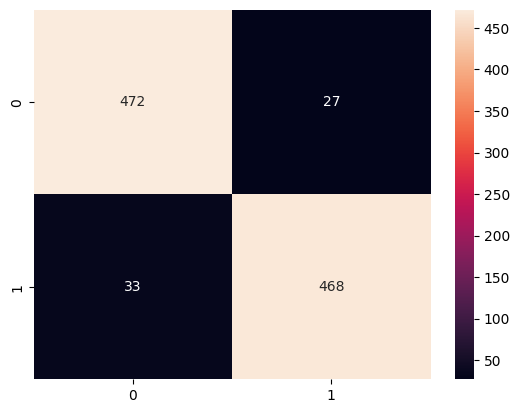

In [133]:
model=RandomForestClassifier()
model.fit(train_scaled,train_setlb)
pred=model.predict(test_scaled)

print('jaccard score:',metrics.jaccard_score(test_setlb,pred))
print('accuracy score:',metrics.accuracy_score(test_setlb,pred))
print('\n')
print(metrics.classification_report(test_setlb,pred))

sns.heatmap(metrics.confusion_matrix(test_setlb,pred),annot=True,fmt='g')
plt.show()


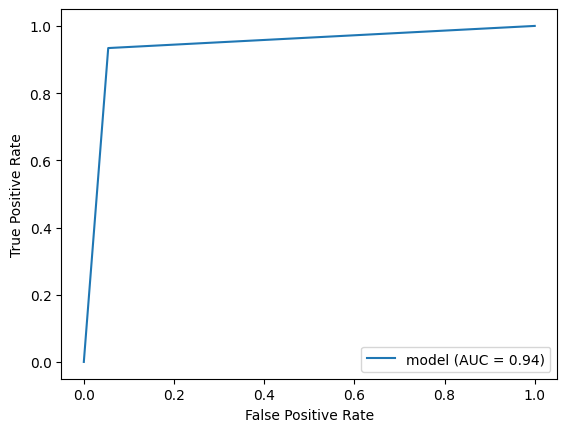

In [134]:
from sklearn.metrics import roc_curve
fpr,tpr,threshholds=roc_curve(test_setlb,pred)
roc_auc=metrics.auc(fpr,tpr)
displayobj=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name='model')
displayobj.plot()
plt.show()

SVM

jaccard score: 0.8651685393258427
accuracy score: 0.928


              precision    recall  f1-score   support

           0       0.92      0.93      0.93       499
           1       0.93      0.92      0.93       501

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



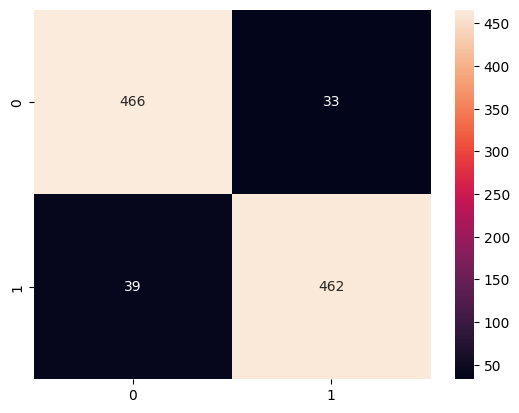

In [135]:
model=SVC()
model.fit(train_scaled,train_setlb)
pred=model.predict(test_scaled)

print('jaccard score:',metrics.jaccard_score(test_setlb,pred))
print('accuracy score:',metrics.accuracy_score(test_setlb,pred))
print('\n')
print(metrics.classification_report(test_setlb,pred))

sns.heatmap(metrics.confusion_matrix(test_setlb,pred),annot=True,fmt='g')
plt.show()


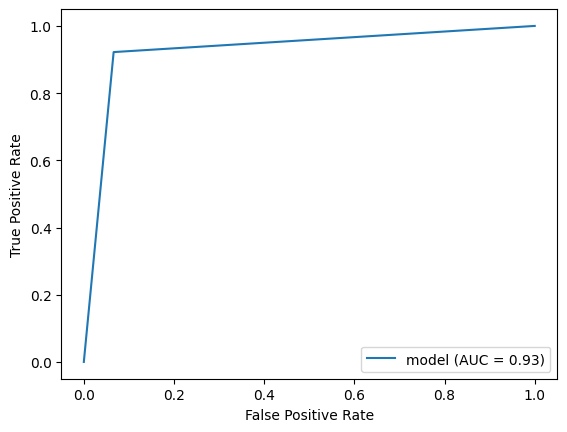

In [136]:
from sklearn.metrics import roc_curve
fpr,tpr,threshholds=roc_curve(test_setlb,pred)
roc_auc=metrics.auc(fpr,tpr)
displayobj=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name='model')
displayobj.plot()
plt.show()

jaccard score: 0.8924528301886793
accuracy score: 0.943


              precision    recall  f1-score   support

           0       0.94      0.94      0.94       499
           1       0.94      0.94      0.94       501

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



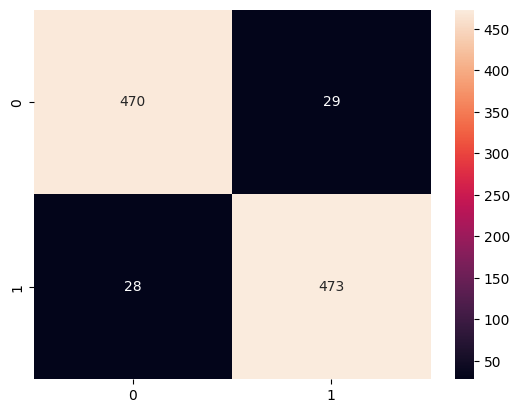

In [147]:
model=XGBClassifier()
model.fit(train_scaled,train_setlb)
pred=model.predict(test_scaled)

print('jaccard score:',metrics.jaccard_score(test_setlb,pred))
print('accuracy score:',metrics.accuracy_score(test_setlb,pred))
print('\n')
print(metrics.classification_report(test_setlb,pred))

sns.heatmap(metrics.confusion_matrix(test_setlb,pred),annot=True,fmt='g')
plt.show()


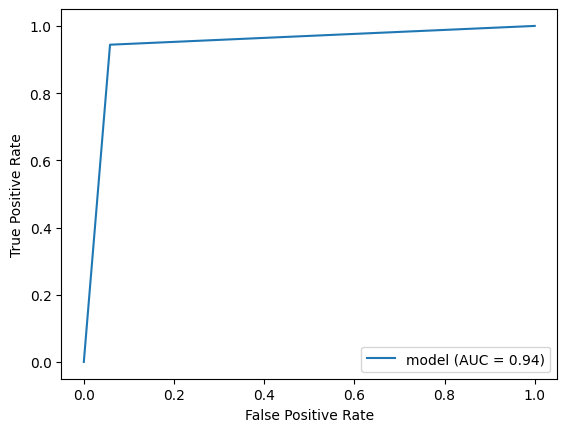

In [148]:
from sklearn.metrics import roc_curve
fpr,tpr,threshholds=roc_curve(test_setlb,pred)
roc_auc=metrics.auc(fpr,tpr)
displayobj=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name='model')
displayobj.plot()
plt.show()

CrossValPredict_with-XGB

In [144]:
X_scaled=scaler.fit_transform(X)
from sklearn.model_selection import cross_val_predict
pred=cross_val_predict(XGBClassifier(),X_scaled,y,cv=5)


jaccard score: 0.9054936611601998
accuracy score: 0.9508


              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5000
           1       0.96      0.94      0.95      5000

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



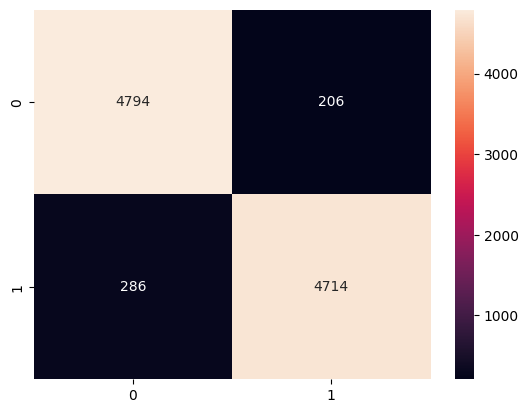

In [145]:
print('jaccard score:',metrics.jaccard_score(y,pred))
print('accuracy score:',metrics.accuracy_score(y,pred))
print('\n')
print(metrics.classification_report(y,pred))

sns.heatmap(metrics.confusion_matrix(y,pred),annot=True,fmt='g')
plt.show()

In [150]:
import joblib

joblib.dump(model,'XGBmodel_forAviaCompany.jbl')
#joblib.load('//path')


['XGBmodel_forAviaCompany.jbl']

outer data


In [152]:
df=pd.read_csv("/content/test_dataset.csv").drop('id',axis=1)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Female,Loyal Customer,25,Personal Travel,Eco,2704,2,2,2,3,2,3,5,2,4,4,3,5,1,5,152,191.0
1,Female,Loyal Customer,49,Business travel,Business,1623,1,1,1,1,3,4,4,2,2,2,2,4,2,3,60,52.0
2,Male,Loyal Customer,51,Business travel,Business,338,4,4,4,4,2,5,5,5,5,5,5,4,5,4,0,0.0
3,Male,Loyal Customer,34,Business travel,Eco Plus,95,0,0,0,3,5,0,1,5,4,4,1,3,3,5,0,0.0
4,Male,Loyal Customer,34,Personal Travel,Eco,602,4,4,4,3,4,5,5,5,4,5,4,5,5,5,130,140.0


In [153]:
df=pd.get_dummies(df)
df.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,25,2704,2,2,2,3,2,3,5,2,4,4,3,5,1,5,152,191.0,1,0,1,0,0,1,0,1,0
1,49,1623,1,1,1,1,3,4,4,2,2,2,2,4,2,3,60,52.0,1,0,1,0,1,0,1,0,0
2,51,338,4,4,4,4,2,5,5,5,5,5,5,4,5,4,0,0.0,0,1,1,0,1,0,1,0,0
3,34,95,0,0,0,3,5,0,1,5,4,4,1,3,3,5,0,0.0,0,1,1,0,1,0,0,0,1
4,34,602,4,4,4,3,4,5,5,5,4,5,4,5,5,5,130,140.0,0,1,1,0,0,1,0,1,0


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4000 non-null   int64  
 1   Flight Distance                    4000 non-null   int64  
 2   Inflight wifi service              4000 non-null   int64  
 3   Departure/Arrival time convenient  4000 non-null   int64  
 4   Ease of Online booking             4000 non-null   int64  
 5   Gate location                      4000 non-null   int64  
 6   Food and drink                     4000 non-null   int64  
 7   Online boarding                    4000 non-null   int64  
 8   Seat comfort                       4000 non-null   int64  
 9   Inflight entertainment             4000 non-null   int64  
 10  On-board service                   4000 non-null   int64  
 11  Leg room service                   4000 non-null   int64

In [159]:
X=df.to_numpy()
X_scaled=scaler.fit_transform(X)
X_scaled[0,:]

array([-1.00949875,  1.4675743 , -0.55639009, -0.657055  , -0.54434125,
        0.01593713, -0.96110758, -0.26508804,  1.1264099 , -1.06790393,
        0.46600793,  0.4608322 , -0.53165112,  1.3243262 , -2.26194287,
        1.25053935,  3.89350692,  4.93599285,  1.00652126, -1.00652126,
        0.47485808, -0.47485808, -1.5946656 ,  1.5946656 , -1.01511421,
        1.1685308 , -0.27382448])

In [ ]:
XGBmodel=joblib.load('/content/XGBmodel_forAviaCompany.jbl')
XGBmodel

In [161]:
labels=XGBmodel.predict(X_scaled)
df['satisfaction_predicted']=labels

In [162]:
df.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_predicted
0,25,2704,2,2,2,3,2,3,5,2,4,4,3,5,1,5,152,191.0,1,0,1,0,0,1,0,1,0,0
1,49,1623,1,1,1,1,3,4,4,2,2,2,2,4,2,3,60,52.0,1,0,1,0,1,0,1,0,0,1
2,51,338,4,4,4,4,2,5,5,5,5,5,5,4,5,4,0,0.0,0,1,1,0,1,0,1,0,0,1
3,34,95,0,0,0,3,5,0,1,5,4,4,1,3,3,5,0,0.0,0,1,1,0,1,0,0,0,1,1
4,34,602,4,4,4,3,4,5,5,5,4,5,4,5,5,5,130,140.0,0,1,1,0,0,1,0,1,0,0


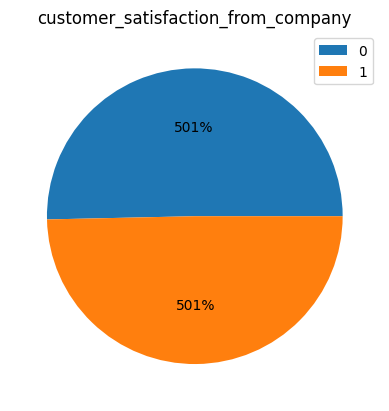

In [170]:
plt.pie(df.satisfaction_predicted.value_counts(),autopct='%1.f1%%',)
plt.title('customer_satisfaction_from_company')
plt.legend(labels=df['satisfaction_predicted'].unique())
plt.show()